<a href="https://colab.research.google.com/github/sweetPototo/Data-Analysis-with-Open-Source/blob/main/energyConsumptionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 : 서울시 에코마일리지 에너지사용량 통계정보

1-2. 오픈소스 연결 및 실행결과

In [7]:
import requests
import time

api_key = "6d4b686f767368703131395a4e4f644d"
data = []

for year in range(2015, 2025):
    for mon in range(1,13):
        mon = f"{mon:02}"
        url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{mon}'
        response = requests.get(url)

        if response.status_code == 200:
            res_json = response.json()
            rows = res_json.get("energyUseDataSummaryInfo",{}).get("row",{})
            for row in rows:
                if row.get("MM_TYPE") == "개인":
                    data.append({
                        "YEAR":row.get("YEAR"),
                        "MON":row.get("MON"),
                        "MM_TYPE":row.get("MM_TYPE"), #회원타입
                        "EUS":row.get("EUS"),         #현년 전기사용량
                        "GUS":row.get("GUS"),         #현년 가스사용량
                        "WUS":row.get("WUS"),         #현년 수도사용량
                        "HUS":row.get("HUS")          #현년 지역난방 사용량
                    })
        else:
            print(f"API 호출 실패: {response.status_code}")
        time.sleep(0.3)

    print(f"{year}년 데이터 적재 완료")
print("수집 결과")
print(data)


2015년 데이터 적재 완료
2016년 데이터 적재 완료
2017년 데이터 적재 완료
2018년 데이터 적재 완료
2019년 데이터 적재 완료
2020년 데이터 적재 완료
2021년 데이터 적재 완료
2022년 데이터 적재 완료
2023년 데이터 적재 완료
2024년 데이터 적재 완료
수집 결과
[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}, {'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}, {'YEAR': '2015', 'MON': '05', 'MM_TYPE': '개인', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}, {'YEAR': '2015', 'MON': '06', 'MM_TYPE': '개인', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}, {'YEAR': '2015', 'MON': '07', 'MM_TYPE': '개인', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}, {'YEAR': '2015', 'MON': '08', 'MM_TYPE': '개인', 'EUS': '242000479', 'GUS': '7619018', 'WUS': '15164553.742', 'HUS': '460288.965'}, {'YEAR': '2015', 'MON': '10', 'MM_TYPE': '개인

2-1. DataFrame으로 변경 및 정보 출력

In [8]:
import pandas as pd

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   YEAR     83 non-null     object
 1   MON      83 non-null     object
 2   MM_TYPE  83 non-null     object
 3   EUS      83 non-null     object
 4   GUS      83 non-null     object
 5   WUS      83 non-null     object
 6   HUS      83 non-null     object
dtypes: object(7)
memory usage: 4.7+ KB


2-2. 연도 및 계절 컬럼 추가

In [23]:
energy_use = df.copy()
energy_use['year'] = df['YEAR']
energy_use['season'] = energy_use['MON'].map({'01':'겨울', '02':'겨울', '03':'봄',
                        '04':'봄', '05':'봄', '06':'여름', '07':'여름', '08':'여름',
                                '09':'가을', '10':'가을', '11':'가을', '12':'겨울'})
print(energy_use)
energy_use.info()

    YEAR MON MM_TYPE        EUS       GUS           WUS           HUS  year  \
0   2015  01      개인  193784708  59133720  12819757.886  22740838.937  2015   
1   2015  02      개인  189974230  56487358  12656888.218  18793320.213  2015   
2   2015  05      개인  177289769  22060892  13086734.214   1320895.801  2015   
3   2015  06      개인  186073153  12677645  14241651.402    294312.634  2015   
4   2015  07      개인  165114568   8893640  12083879.038    702863.645  2015   
..   ...  ..     ...        ...       ...           ...           ...   ...   
78  2024  08      개인  463971328   7072251    15873544.6    130082.263  2024   
79  2024  09      개인  409872908   5729131    15143321.6   3420507.136  2024   
80  2024  10      개인  282268119   8233421    15297669.9   2695491.396  2024   
81  2024  11      개인  257927956  17418221    14678672.5   8836296.454  2024   
82  2024  12      개인  134828126  42103424     7326853.6   1513199.277  2024   

   season  
0      겨울  
1      겨울  
2       봄  
3  

데이터 시각화를 위한 사전 준비

In [4]:
# 한글 처리를 위한 matplotlib 설정 (1)
# 리눅스에서 실행됨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,799 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

3-1. 데이터 시각화

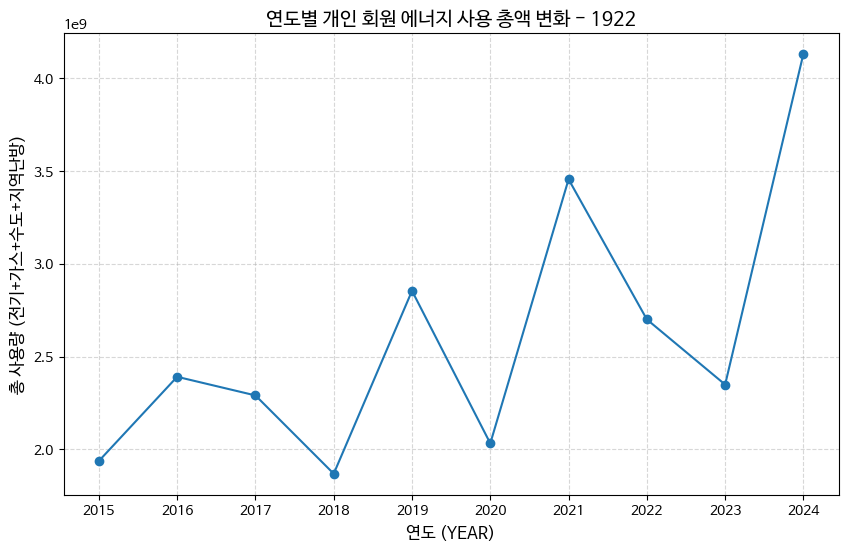

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 연도별로 합계 계산
energy_use['TOTAL_USE'] = energy_use['EUS'] + energy_use['GUS'] + energy_use['WUS'] + energy_use['HUS']
year_sum = energy_use.groupby('YEAR')['TOTAL_USE'].sum().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))
# 선 그래프 그리기
plt.plot(year_sum['YEAR'], year_sum['TOTAL_USE'], marker='o')

# 그래프 제목, 축 라벨
plt.title('연도별 개인 회원 에너지 사용 총액 변화 - 1922', fontsize=14)
plt.xlabel('연도 (YEAR)', fontsize=12)
plt.ylabel('총 사용량 (전기+가스+수도+지역난방)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


/tmp/ipython-input-3405323664.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = energy_use.groupby('season')['GUS'].mean().reset_index()


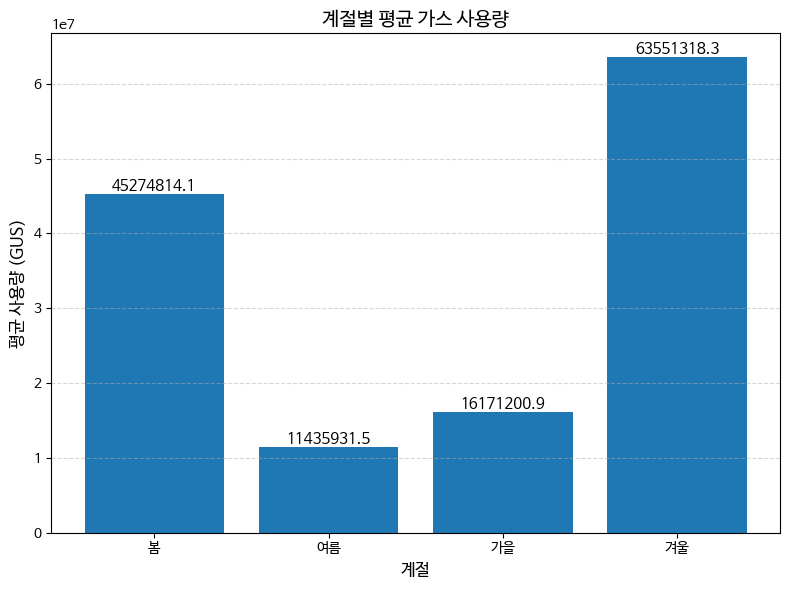

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프의 막대 출력 순서 지정
season_order = ['봄', '여름', '가을', '겨울']
energy_use['GUS'] = pd.to_numeric(energy_use['GUS'], errors='coerce')
energy_use['season'] = pd.Categorical(energy_use['season'], categories=season_order, ordered=True)

# 계절별 평균 가스 사용량 계산
season_avg = energy_use.groupby('season')['GUS'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 막대 그래프 생성
bars = plt.bar(season_avg['season'], season_avg['GUS'])

# 막대 위에 평균값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=11)

# 제목, 축 이름
plt.title('계절별 평균 가스 사용량', fontsize=14)
plt.xlabel('계절', fontsize=12)
plt.ylabel('평균 사용량 (GUS)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
